In [1]:
from scipy.misc import imread
from sklearn.externals import joblib

import random as rand
import numpy as np 
import cv2
import glob
import time

import matplotlib.pyplot as plt
%matplotlib inline

from helpers import convert, show_images, put_boxes, box_boundaries
from featuresourcer import FeatureSourcer
from binaryclassifier import BinaryClassifier
from slider import Slider
from heatmap import HeatMap 

In [2]:
svc = joblib.load('svc.pkl')
scaler = joblib.load('scaler.pkl')

cls = BinaryClassifier(svc, scaler)

sourcer_params = {
  'color_model': 'hls',                # HSL, HSV
  'bounding_box_size': 64,             #
  'number_of_orientations': 12,        # 6 - 12
  'pixels_per_cell': 8,                # 8, 16
  'cells_per_block': 2,                # 1, 2
  'do_transform_sqrt': True
}

small_img = imread("vehicles/KITTI_extracted/5364.png")

src = FeatureSourcer(sourcer_params, small_img)
slider = Slider(sourcer = src, classifier = cls, increment = 8)

frame1 = imread("test1.jpg")
frame2 = imread("test2.jpg")
frame3 = imread("test3.jpg")
frame4 = imread("test4.jpg")
frame5 = imread("test5.jpg")
frame6 = imread("test6.jpg")

window_sizes = 80, 120, 160, 180, 210
window_positions = 410, 390, 380, 380, 400

heatmap = HeatMap(frame = frame1, thresh = 3, memory = 12)

E:\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator LinearSVC from version 0.18 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
E:\Anaconda3\lib\site-packages\sklearn\base.py:311: UserWarning: Trying to unpickle estimator StandardScaler from version 0.18 when using version 0.19.1. This might lead to breaking code or invalid results. Use at your own risk.
  UserWarning)
E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  from ipykernel import kernelapp as app
E:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)
E:\Anaconda3\lib\site-packages\ipykernel_lau

In [3]:
def heatmap_test(this_frame, this_heatmap, ws, wp):
  this_heatmap.reset()

  for sz, pos in zip(ws, wp):
    bounding_boxes = slider.locate(frame = this_frame, window_size = sz, window_position = pos)
    this_heatmap.update(bounding_boxes)

  this_heatmap.show(this_frame)

E:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


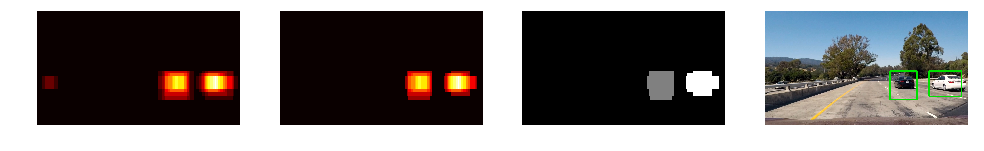

In [4]:
heatmap_test(frame1, heatmap, window_sizes, window_positions)

E:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


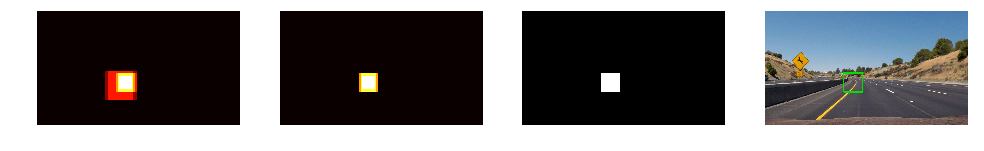

In [5]:
heatmap_test(frame2, heatmap, window_sizes, window_positions)

E:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


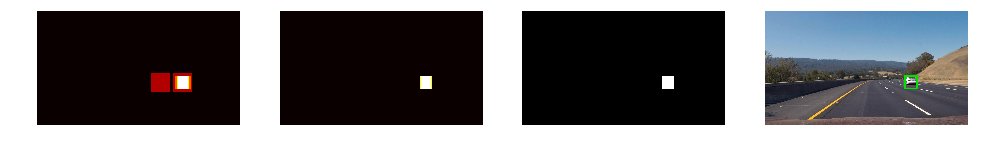

In [6]:
heatmap_test(frame3, heatmap, window_sizes, window_positions)

E:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


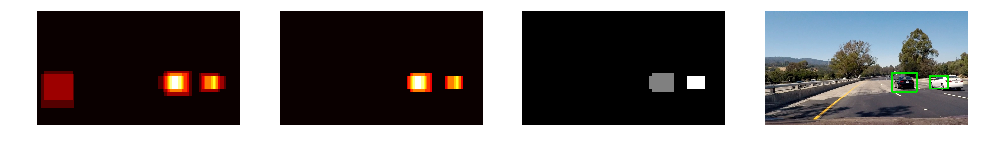

In [7]:
heatmap_test(frame4, heatmap, window_sizes, window_positions)

E:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


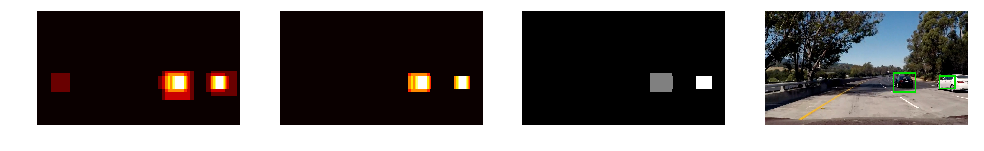

In [8]:
heatmap_test(frame5, heatmap, window_sizes, window_positions)

E:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


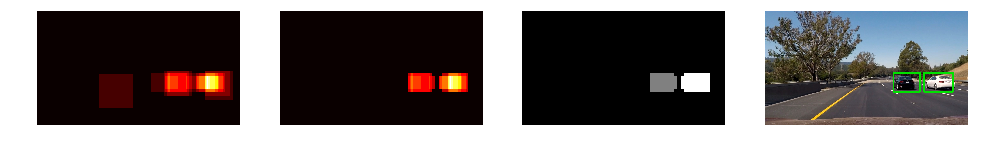

In [9]:
heatmap_test(frame6, heatmap, window_sizes, window_positions)

In [10]:
ws = 80, 120, 160, 180, 240
wp = 410, 390, 380, 380, 370
this_frame = imread("test6.jpg")
heatmap.reset()

for sz, pos in zip(ws, wp):
  bounding_boxes = slider.locate(frame = this_frame, window_size = sz, window_position = pos)
  heatmap.update(bounding_boxes)

mp, tmp, lmp = heatmap.get()
labeled_img = heatmap.draw(this_frame)

E:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  This is separate from the ipykernel package so we can avoid doing imports until
E:\Anaconda3\lib\site-packages\skimage\feature\_hog.py:119: skimage_deprecation: Default value of `block_norm`==`L1` is deprecated and will be changed to `L2-Hys` in v0.15
  'be changed to `L2-Hys` in v0.15', skimage_deprecation)


In [11]:
def hot_to_rgb(data):
  data_ = (data - np.min(data))/ (np.max(data) - np.min(data))
  my_cmap = plt.cm.get_cmap('hot')
  color_array = my_cmap(data_)
  return color_array

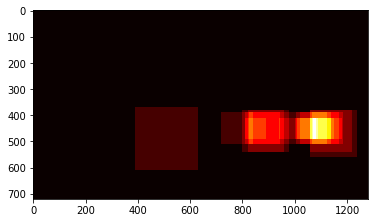

In [12]:
img = hot_to_rgb(mp)
plt.imshow(np.dstack((img[:, :, 0], img[:, :, 1], img[:, :, 2])))

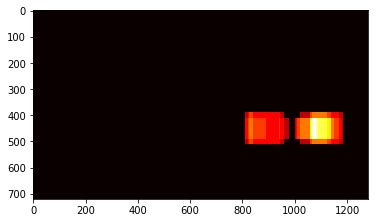

In [13]:
plt.imshow(hot_to_rgb(tmp))

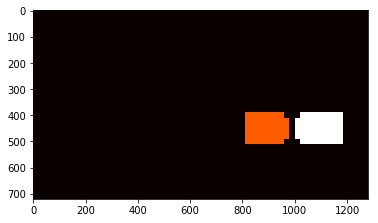

In [14]:
plt.imshow(hot_to_rgb(lmp))